# Итоговая работа.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [8]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [9]:
#надо найти угол между векторами, там где он минимален, там векторы максимально сонаправлены, пользователи наиболее похожи
a1 = np.array([])
#задаем переменную угла между векторами, по умолчанию ставим 90(векторы перпендикулярны)
total = 90
# прогоняем в цикле по всем пользователям(векторам, т.е. строкам)
for i in range(10):
    for j in range(10):
        #исключаем случаи умножения вектора на самого себя
        if i == j:
            continue
        else:
            # x = i-ый  и y =j -ый пользователи
            x = raitings[i]
            y = raitings[j]
            np.dot(x, y)
            np.linalg.norm(x)
            np.linalg.norm(y)
            #находим cos из формулы скалярного произведения
            cos = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
            #далее находим arccos, т.е. уже угол и выбираем наименьший
            if np.arccos(cos) < total:
                total = np.arccos(cos)
                a1 = [i, j, total]
                

a1
#получаем, что 2 и 9 пользователи максимально похожи

[2, 9, 0.4059427825664745]

In [20]:
pca = PCA(n_components=5)
X = pca.fit_transform(raitings)
X

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [21]:
from scipy import misc
import numpy as np

In [36]:
# импортируем sympy
from sympy import * 
# определяем переменные
x, y = symbols('x y')

f = (tan(sin(x)+cos(2*x+3)))**2

print("Функция : {}".format(f))

# используем sympy.diff() метод для получения производной
dif = diff(f, x)

print("Производная функции : {}".format(dif))



Функция : tan(sin(x) + cos(2*x + 3))**2
Производная функции : 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [38]:
#используем misc.derivative для вычисления производной в точке x=1
def g(x):
        return (tan(sin(x)+cos(2*x+3)))**2
print('Первая производная в точке x=1:', misc.derivative(g, 1, n=1, dx=1e-6))


Первая производная в точке x=1: 55.3859176433136


In [35]:
d1 = 2*(-2*sin(2*1 + 3) + cos(1))*(tan(sin(1) + cos(2*1 + 3))**2 + 1)*tan(sin(1) + cos(2*1 + 3))
gfg = d1.evalf()
print(gfg)

55.3859176353379


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [40]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [39]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [41]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

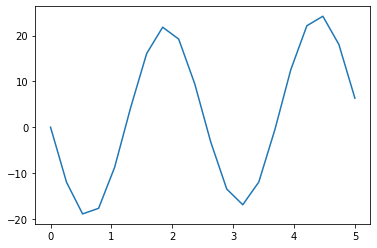

In [42]:
plt.plot(x, fx)
plt.show()

In [43]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [47]:
#поможет функция minimize(), с ней легче всего, просто передаём функцию ошибки, начальные значения [0, 0] 
#и задаём метод (в файле с рекомендациями 'COBYLA'), 
#в результате выполнения получите в части x: оптимальные значения параметров a и b.

x0 = [0, 0] 
res = minimize(error, x0, method='COBYLA')
res

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [51]:
rv = np.random.randint(0, 100, size=20)
rv

array([38, 12, 29, 39, 60, 42, 27,  4, 32, 95, 60,  1, 75, 76, 16,  0, 92,
       56, 48, 93])

In [54]:
#rv = sts.expon(0)
np.random.choice(rv, size=50)


array([60,  0, 48, 48, 39, 95, 60, 42, 56, 60, 92, 56,  0, 12, 32, 29, 60,
       56, 75, 16, 76,  4,  4, 29, 76, 76, 60, 38, 48, 16, 60, 75,  0, 29,
       95, 56,  4, 48, 29, 76,  0, 12, 39,  0, 42, 16, 56, 92,  4, 42])

In [57]:
samples_count = 1000
# Массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # На каждом цикле генерируем выборки разных размеров
    sample1 = np.random.choice(rv, size=50)
    # Считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())
a1

array([43.62, 43.12, 47.76, 41.  , 42.8 , 43.52, 46.04, 46.02, 40.8 ,
       41.88, 35.28, 39.02, 41.78, 46.  , 45.2 , 43.9 , 47.72, 42.96,
       47.4 , 36.36, 50.84, 47.62, 44.1 , 46.78, 40.8 , 48.42, 42.98,
       42.28, 45.28, 45.66, 42.12, 44.06, 44.38, 40.12, 47.54, 41.18,
       42.82, 51.22, 42.32, 44.26, 52.92, 47.28, 47.32, 48.34, 52.78,
       51.36, 46.96, 40.72, 42.66, 43.82, 38.32, 47.14, 39.72, 47.7 ,
       44.1 , 50.78, 47.48, 46.8 , 51.84, 44.96, 49.54, 45.24, 44.22,
       41.04, 45.32, 42.4 , 40.3 , 43.76, 44.68, 43.5 , 46.28, 39.5 ,
       43.14, 45.7 , 43.6 , 42.04, 46.72, 37.32, 42.26, 40.08, 49.64,
       48.76, 46.94, 48.6 , 44.14, 53.5 , 37.5 , 47.88, 49.14, 36.02,
       42.44, 42.64, 42.46, 46.08, 46.62, 42.34, 49.32, 42.18, 47.16,
       42.24, 48.12, 49.66, 48.98, 46.98, 48.56, 51.54, 40.74, 37.52,
       45.7 , 40.96, 43.88, 46.52, 41.64, 48.62, 45.8 , 48.02, 47.96,
       46.32, 42.96, 46.12, 41.28, 43.5 , 41.84, 40.34, 48.5 , 50.66,
       41.9 , 48.12,

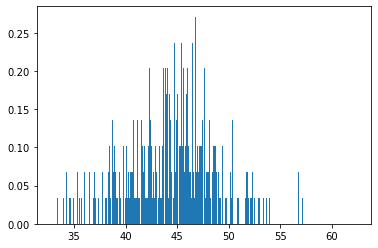

In [56]:
plt.hist(a1, density=True, bins=1000)
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [58]:
m = np.array([[1, 4],
              [1, 1]])
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))